# 7. Genetic algorithms


Genetic algorithms mimic natural selection and genetics to evolve solutions to problems over successive generations. Suppose we have a sequence of musical objects, described as:

```
[🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨]
```

We can clone it to obtain a population. But as in life, cloning is not perfect and mutations can occur.

```
[
    [🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟦, 🟨, 🟨, 🟨, 🟨],
    [🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨],
    [🟨, 🟨, 🟨, 🟨, 🟦, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨],
    [🟨, 🟨, 🟥, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟦, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨],
    [🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨]
]
```

These mutations could benefit a sequence, or not. We need to quantify the benefit/detriment aquired after mutation.

```
[
    [🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟦, 🟨, 🟨, 🟨, 🟨], : score 58
    [🟨, 🟨, 🟨, 🟨, 🟦, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨], : score 56
    [🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨], : score 50
    [🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨], : score 50
    [🟨, 🟨, 🟥, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟦, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨]  : score 34
]
```

We can breed together the best ones (let's say the two best ones who survived) to create childs. Childs can have the traits of a parent of another, and also can contain mutations.

```
[
    [🟩, 🟨, 🟨, 🟨, 🟨, 🟨, 🟥, 🟨, 🟨, 🟨, 🟨, 🟦, 🟨, 🟨, 🟨, 🟨], : score 67
    [🟨, 🟩, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟦, 🟨, 🟨, 🟨, 🟩, 🟨, 🟨]  : score 62
    [🟨, 🟨, 🟨, 🟨, 🟦, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟦, 🟨, 🟨, 🟨, 🟨], : score 61
    [🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨], : score 50
    [🟨, 🟨, 🟨, 🟨, 🟦, 🟩, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨, 🟨], : score 46
]
```

And so on. Given an initial population, scoring criteria, number of best mates, mutation rates and number of generations, we can "evolve" a piece of music.

## The `Darwin` class

The `Darwin` class of the in the `genetic` module takes care of the evolution process, while the `Index` class of the `analysis` module takes care of scoring.

### 1. Population Initialization

The evolutionary journey begins with the creation of an initial population. In the `Darwin` class, this population is a list of notes, or track, complying to Djaldo's notation, where each note is a (midi pitch, duration, offset) tuple. This population acts as the gene pool from which new musical ideas will be generated and evolved. The diversity within this initial population is crucial as it lays the foundation for genetic variation and the potential for innovative musical creations. Twinkle, twinkle little star in C-major can be used as our primordial soup.

In [1]:
import djalgo as dj
initial_phrases = [[
    (60, 1.0, 0.0),  # C (twin)
    (60, 1.0, 1.0),  # C (kle)
    (67, 1.0, 2.0),  # G (twin)
    (67, 1.0, 3.0),  # G (kle)
    (69, 1.0, 4.0),  # A (lit)
    (69, 1.0, 5.0),  # A (tle)
    (67, 2.0, 6.0),  # G (star)
    (65, 1.0, 8.0),  # F (how)
    (65, 1.0, 9.0),  # F (I)
    (64, 1.0, 10.0), # E (won)
    (64, 1.0, 11.0), # E (der)
    (62, 1.0, 12.0), # D (what)
    (62, 1.0, 13.0), # D (you)
    (60, 2.0, 14.0)  # C (are)
]]

### 2. Fitness Evaluation

Once the population is established, each member (musical phrase) undergoes a fitness evaluation. This is where the `Index` class assesses how well each phrase meets predefined quantitative criteria based on a variety of metrics, including pitch diversity, rhythmic balance, and motif development. The code used to compute each index can be found in the Index class. An overall score is computed as the weighted similarity to ideal scores defined as targets. This score determines the phrase's suitability and guides the selection process for the next generation. The higher the similarity score, the better the musical phrase aligns with the desired compositional goals. 

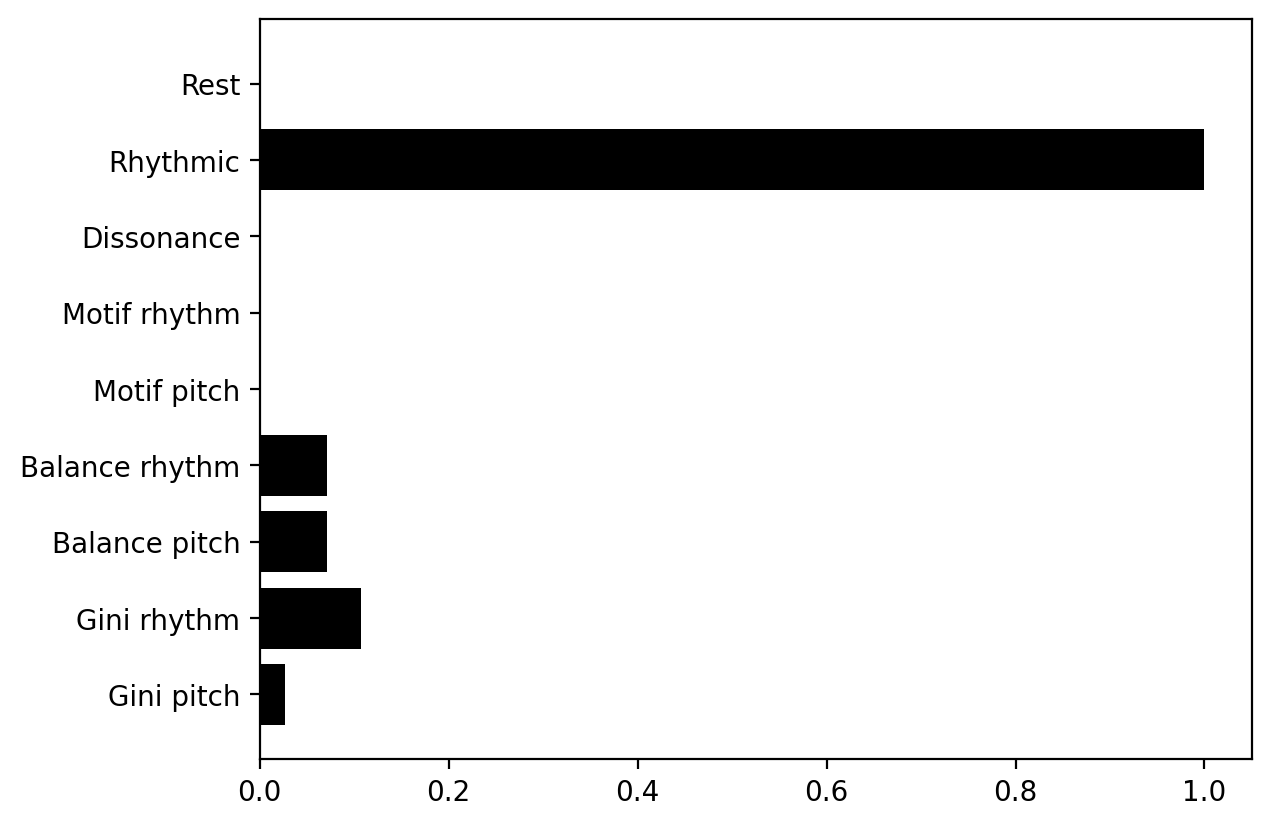

In [2]:
p_initial = [note[0] for note in initial_phrases[0]]
r_initial = [note[1] for note in initial_phrases[0]]

import matplotlib.pyplot as plt

gini_pitch_initial = dj.analysis.Index(p_initial).gini()
gini_rhythm_initial = dj.analysis.Index(r_initial).gini()
balance_pitch_initial = dj.analysis.Index(p_initial).balance()
balance_rhythm_initial = dj.analysis.Index(r_initial).balance()
motif_pitch_initial = dj.analysis.Index(p_initial).motif()
motif_rhythm_initial = dj.analysis.Index(r_initial).motif()
dissonance_initial = dj.analysis.Index(p_initial).dissonance(scale=dj.harmony.Scale(tonic='C', mode='major').generate())
rhythmic_initial = dj.analysis.Index(r_initial).rhythmic(measure_length=4)
rest_initial = sum([i is None for i in p_initial])/len(p_initial)

initial_values = [
    gini_pitch_initial, gini_rhythm_initial, balance_pitch_initial,
    balance_rhythm_initial, motif_pitch_initial, motif_rhythm_initial,
    dissonance_initial, rhythmic_initial, rest_initial
]
categories = [
    'Gini pitch', 'Gini rhythm', 'Balance pitch', 'Balance rhythm',
    'Motif pitch', 'Motif rhythm', 'Dissonance', 'Rhythmic', 'Rest'
]

plt.barh(categories, initial_values, color='black');

In the beginning, the population is composed of clones of the initial musical phrase. So the fitness score of each individual of the initial population should be equal. Until mutations happen.

### 3. Mutation

Mutation introduces random changes to the musical phrases. In the Darwin class, this can involve altering the pitch, duration, or offset of notes within a phrase - although in practice it is more convenient to consider the offset as a consequence of following durations. The mutation rate determines the probability of these changes occurring and is a critical factor in maintaining genetic diversity within the population. By introducing new variations, mutation ensures that the evolutionary process does not stagnate and allows for the exploration of new musical territories.

### 4. Selection

Selection is the process of choosing the fittest individuals from the population to carry forward to the next generation. The Darwin class typically employs a method where the top-performing musical phrases (based on their fitness scores) are selected. This mimics natural selection, where the most adapted individuals have a higher chance of survival and reproduction. The selected phrases ensure that the population's quality improves over generations, moving closer to the desired musical objectives.

### 5. Crossover

Crossover, or recombination, is the process where genetic material is exchanged between the phrases of two random parents (who survived to the selection process) to produce new offspring phrases. This is akin to mating in natural systems. In the context of the `Darwin` class, segments from two selected musical phrases are combined to create new phrases. This mixing of genetic information promotes diversity within the population and contributes to the development of innovative and complex musical compositions.

### 6. The Evolution Process

The evolution process in the `Darwin` class encompasses the repeated application of mutation, selection, and crossover over multiple generations. With each generation, the population undergoes mutation and recombination, followed by the selection of the fittest individuals based on their adaptedness to the musical criteria. This cycle continues iteratively, with the population ideally becoming more refined and closer to the desired musical goals with each generation.

With the groundwork laid, we proceed to the core of our exploration: the application of the Darwin class to evolve our musical phrases. This process is initialized as follows (no worries, the code is explained just below).

In [3]:
import numpy as np
from scipy.stats import norm, expon, poisson

weights = {
    'gini': (1.0, 1.0, 0.0),
    'balance': (1.0, 1.0, 0.0),
    'motif': (10.0, 1.0, 0.0),
    'dissonance': (1.0, 0.0, 0.0),
    'rhythmic': (0, 10.0, 0),
    'rest': (1.0, 0.0, 0.0)
}

targets = {
    'gini': (0.2, 0.5, 0.0),
    'balance': (0.5, 0.1, 0.0),
    'motif': (0.8, 0.5, 0.0),
    'dissonance': (0.05, 0.0, 0.0),
    'rhythmic': (0.0, 1.0, 0.0),
    'rest': (0.0, 0.0, 0.0)
}

mutation_probabilities = {
    'pitch': lambda: max(0, min(127, int(norm.rvs(loc=60, scale=5)))),  # Normal distribution centered at 60 (Middle C) with standard deviation 5
    'duration': lambda: int(expon.rvs(scale=1)),  # Exponential distribution for duration
    'rest': lambda: None if poisson.rvs(mu=0.02) > 0 else 1  # Poisson distribution for rest
}

evolver = dj.genetic.Darwin(
    initial_phrases=initial_phrases,
    mutation_rate=0.05,
    population_size=200,
    mutation_probabilities=mutation_probabilities,
    scale=dj.harmony.Scale(tonic='C', mode='major').generate(),
    measure_length=4,
    time_resolution=[0.25, 4],
    weights = weights,
    targets = targets,
    seed=111
)

Here, the Darwin class encapsulates the genetic algorithm, facilitating the evolution of our initial musical phrases through processes of mutation, selection, and crossover. The parameters such as `mutation_rate`, `population_size`, and `time_resolution` define the environment and rules under which our musical compositions will evolve. The `weights` are ponderations quantifying the importance of the index in the computation of (pitch, duration, offset) notes. Usually, you'll want weights to be zero in offsets. The `targets` argument specifies the values the evolution should be going toward. If the weight of the offsets are zero, the value of the corresponding target won't matter. These values can be modulated at will, but you could as well avoiding defining them and keep with the reasonnable values encoded in Djalgo.

If a mutation occur, the `mutation_probabilities` is triggered to alter the musical phrase in terms of pitch, duration and the number of rests. You can change these probabilities to your desire, but you mostly would ignore it. If ignore, `Darwin` will use its tested defaults, which seemed to be working in most cases.

This evolution process is ran in a for loop. It's the heart of the genetic algorithm, where each cycle represents a generational shift towards optimal musical phrases based on the weights an targets. After some iterations, the musical piece should stop its evolution, since it's no longer relying on finding good parents, but rather relying on random mutations to improve.

In [4]:
for _ in range(100):
    evolver.evolve(k=10, rest_rate=0.0)

We can plot the similarity score to make sure it indeed evolved.

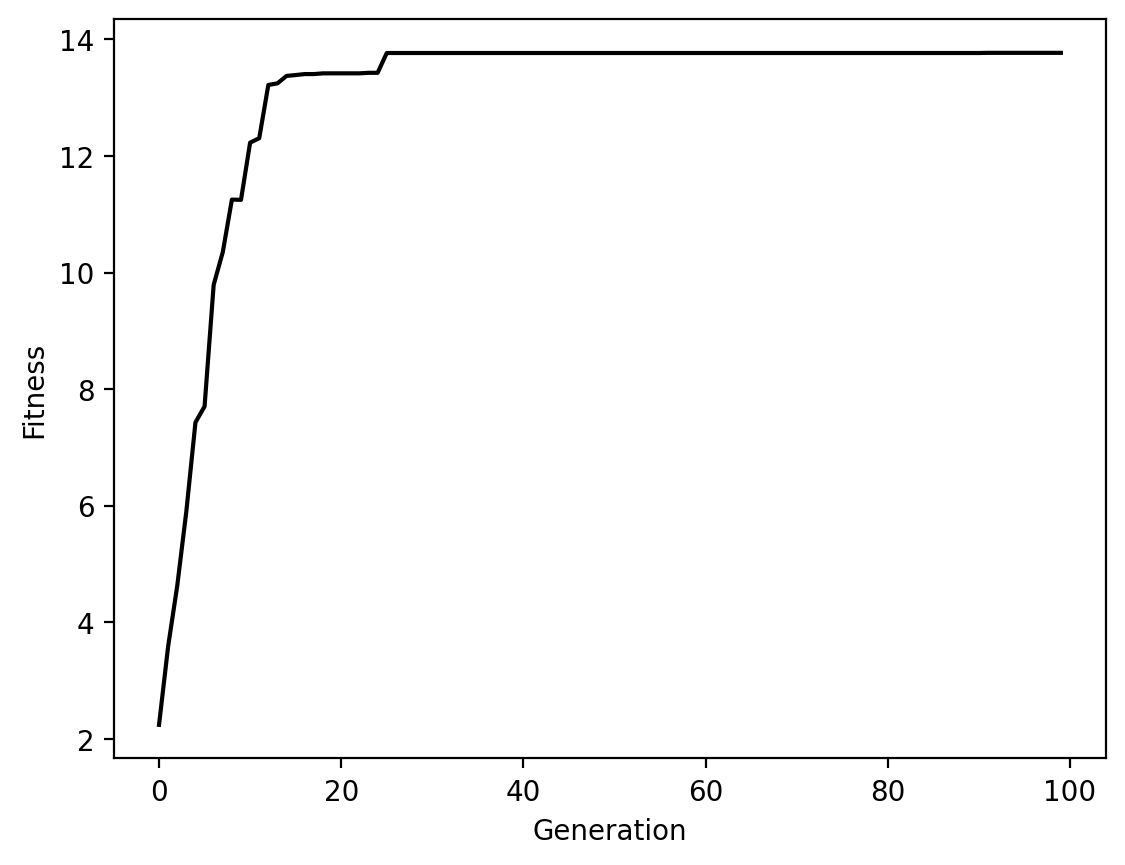

In [5]:
plt.plot(evolver.best_scores, color='black')
plt.xlabel('Generation')
plt.ylabel('Fitness');

Upon the conclusion of the evolutionary cycles, it's crucial to evaluate the transformed musical material.

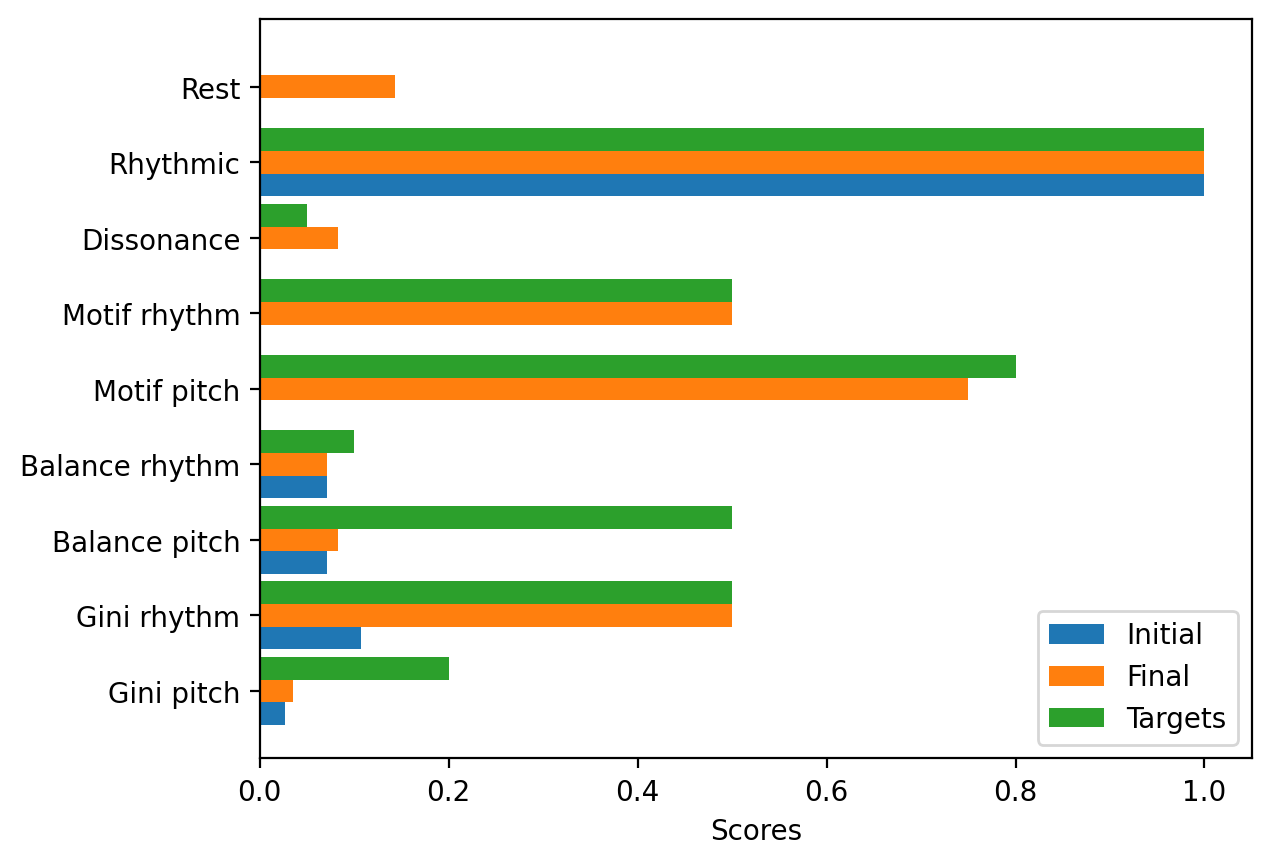

In [6]:
p_final = [note[0] for note in evolver.best_individuals[-1]]
r_final = [note[1] for note in evolver.best_individuals[-1]]

gini_pitch_final = dj.analysis.Index(p_final).gini()
gini_rhythm_final = dj.analysis.Index(r_final).gini()
balance_pitch_final = dj.analysis.Index(p_final).balance()
balance_rhythm_final = dj.analysis.Index(r_final).balance()
motif_pitch_final = dj.analysis.Index(p_final).motif()
motif_rhythm_final = dj.analysis.Index(r_final).motif()
dissonance_final = dj.analysis.Index(p_final).dissonance(scale=dj.harmony.Scale(tonic='C', mode='major').generate())
rhythmic_final = dj.analysis.Index(r_final).rhythmic(measure_length=4)
rest_final = sum([i is None for i in p_final])/len(p_final)

final_values = [
    gini_pitch_final, gini_rhythm_final, balance_pitch_final, balance_rhythm_final,
    motif_pitch_final, motif_rhythm_final, dissonance_final, rhythmic_final, rest_final
]
target_values = [
    targets['gini'][0], targets['gini'][1], targets['balance'][0], targets['balance'][1],
    targets['motif'][0], targets['motif'][1], targets['dissonance'][0], targets['rhythmic'][1], targets['rest'][0]
]

y = np.arange(len(categories))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.barh(y - width, initial_values, width, label='Initial')
rects2 = ax.barh(y, final_values, width, label='Final')
rects3 = ax.barh(y + width, target_values, width, label='Targets')

ax.set_xlabel('Scores')
ax.set_yticks(y)
ax.set_yticklabels(categories)
ax.legend();

Although rhythmic got farther from the target, other indices got closer. Here our final piece!

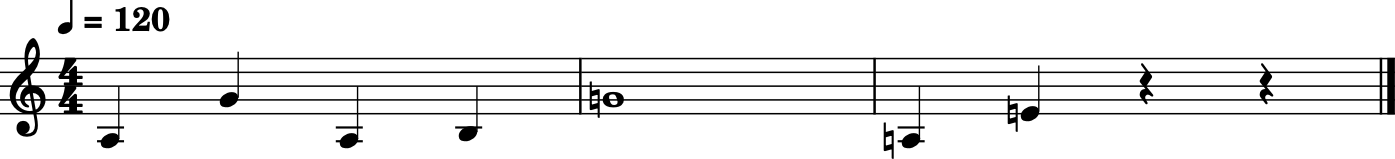

In [7]:
galapagos_stars = dj.utils.quantize_notes(evolver.best_individuals[-1], 4, 0.125)
dj.conversion.convert(galapagos_stars, to='music21').show()
dj.conversion.convert(galapagos_stars, to='music21').show('midi')

The result is quite boring. But seeing how pitches evolved grasps the underlying process.

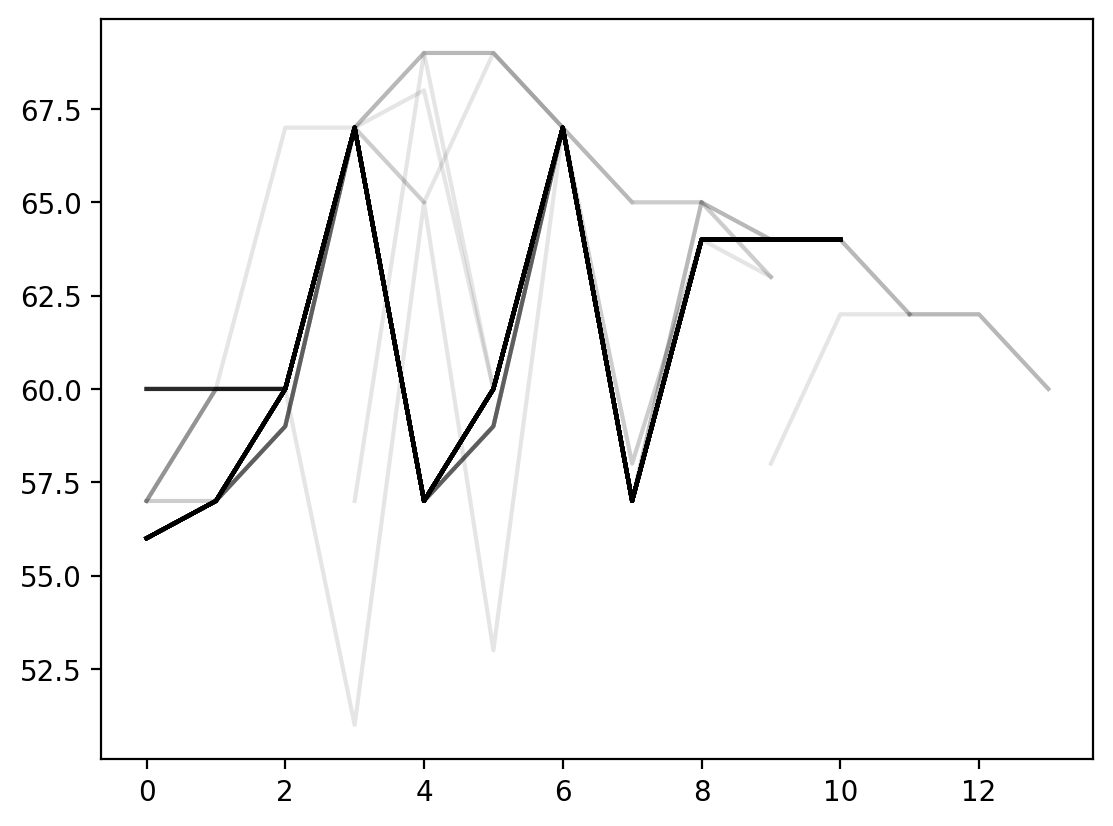

In [8]:
for i in range(len(evolver.best_individuals)):
    pitches = [note[0] for note in evolver.best_individuals[i]]
    plt.plot(pitches, color='black', alpha=0.1)

Through this structured evolutionary process, the `Darwin` class facilitates the generation of new and innovative musical compositions that evolve over time, guided by the principles of genetic variation, selection, and inheritance. The end result is a dynamic exploration of musical possibilities that extends beyond traditional composition techniques.